# MOwNiT – aproksymacja średniokwadratowa wielomianami algebraicznymi

__Przygotował:__
__Szymon Budziak__

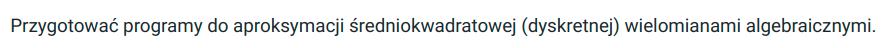

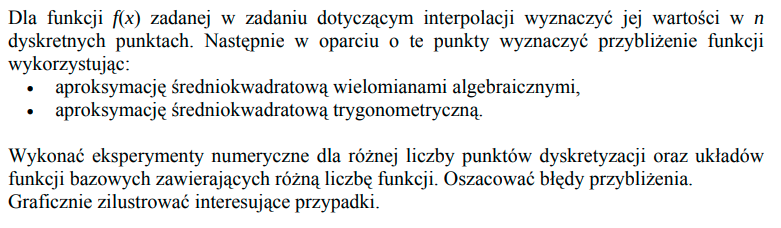

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Function to interpolate

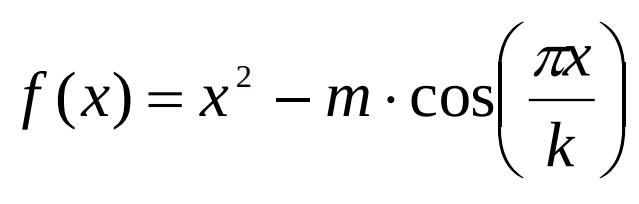

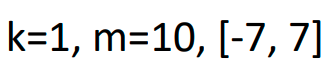

In [2]:
def func(x):
    k = 1
    m = 10
    y = x**2 - m*np.cos((np.pi*x) / k)
    return y

**Plot of the function**

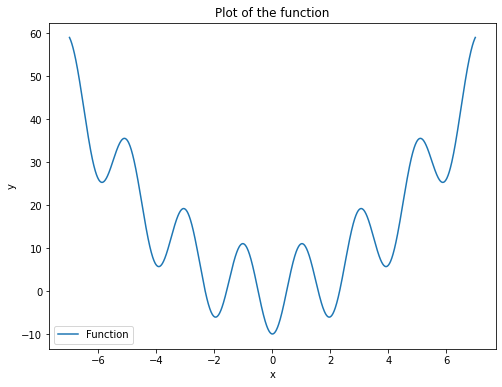

In [3]:
plt.figure(figsize=(8,6))
X = np.arange(-7, 7+0.01, 0.01)
plt.plot(X, func(X), label = "Function")
plt.title(f"Plot of the function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Visualization

In [4]:
def visualize(x, y, start, stop, n, m, function):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, label="data", color="red")
    X = np.arange(start, stop+0.01, 0.01)
    plt.plot(X, func(X), label = "Function",color="red")
    plt.plot(X, function(X), label = "Least squares polynomial approximation", color="blue")
    plt.title(f"Least squares polynomial approximation on {n} nodes and m={m}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

## Errors

In [5]:
def max_error(Y1, Y2):
    return np.max([abs(Y1[i] - Y2[i]) for i in range(len(Y1))])

In [6]:
def sum_square_error(Y1, Y2):
    return sum([(Y1[i] - Y2[i])**2 for i in range(len(Y1))])

## Least squares polynomial approximation

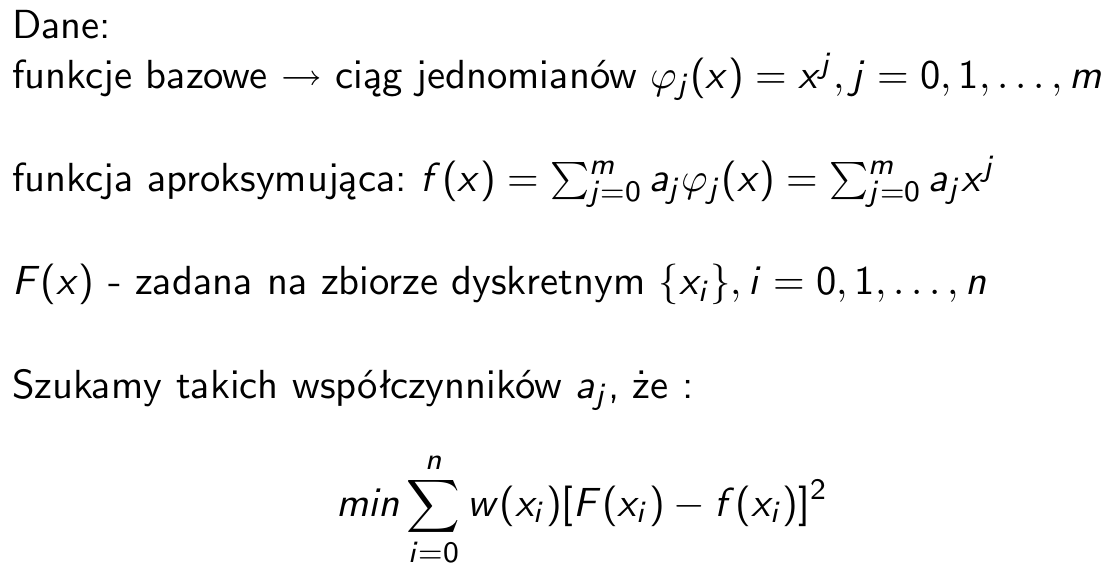

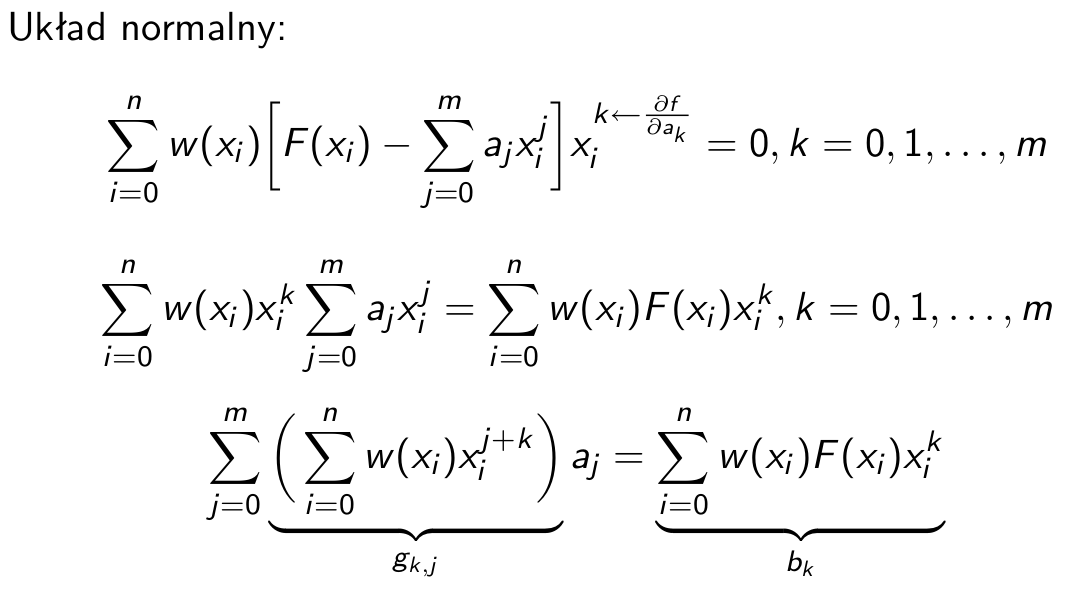

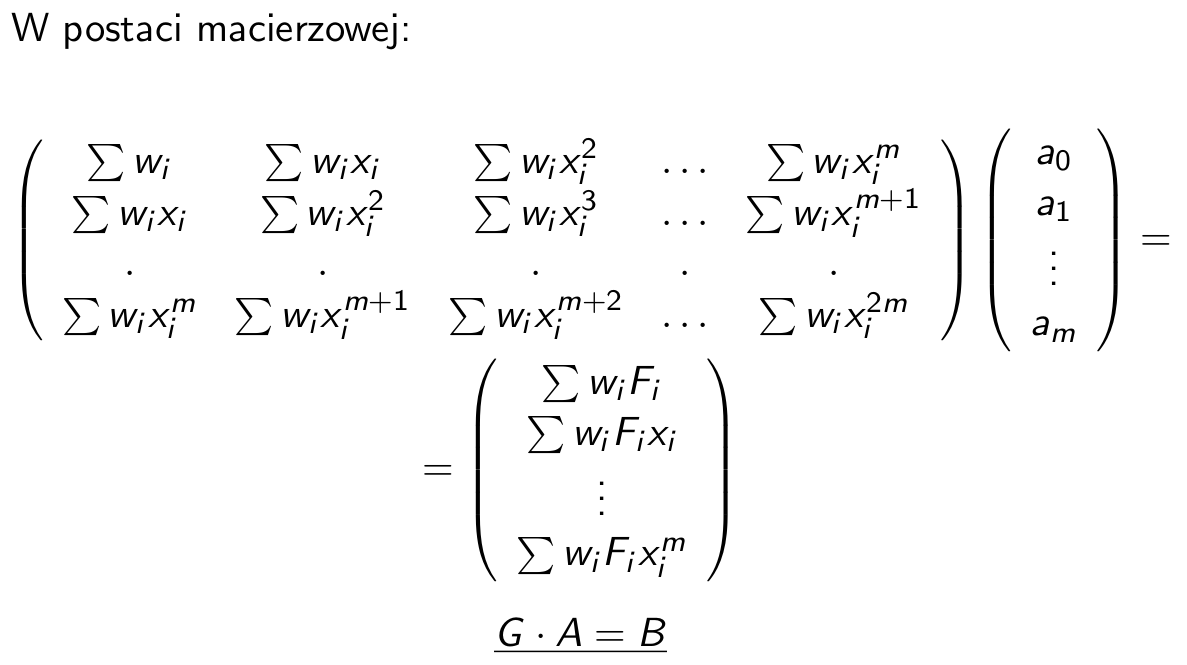

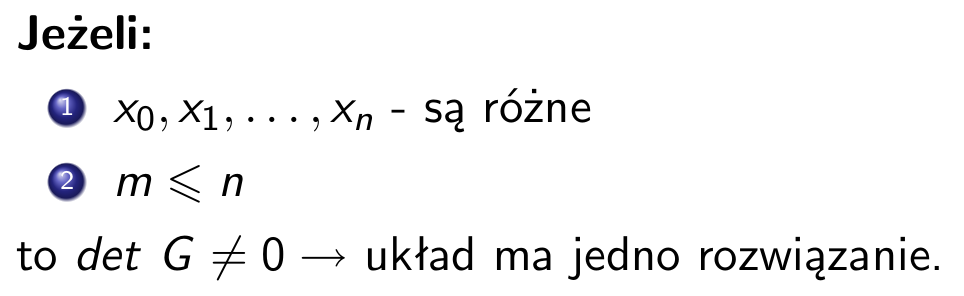

In [7]:
def calculate_A(G, B):
    A = np.linalg.solve(G, B)
    return A
    
def least_squares_approximation_func(X, Y, m):
    n = len(X)
    weights = [1] * n
    G = np.zeros((m, m))
    B = np.zeros(m)
    
    for j in range(m):
        for k in range(m):
            G[j, k] = sum(weights[i] * X[i]**(j+k) for i in range(n))
        B[j] = sum(weights[i] * Y[i] * X[i]**j for i in range(n))
    A = calculate_A(G, B)
    return lambda x: sum(A[i] * x**i for i in range(m))

In [8]:
def ls_approximation(start, stop, n, m):
    X = np.linspace(start, stop, n)
    Y = func(X)
    ls_appr_res = least_squares_approximation_func(X, Y, m)
    visualize(X, Y, start, stop, n, m, ls_appr_res)

n = 5 and m = 3

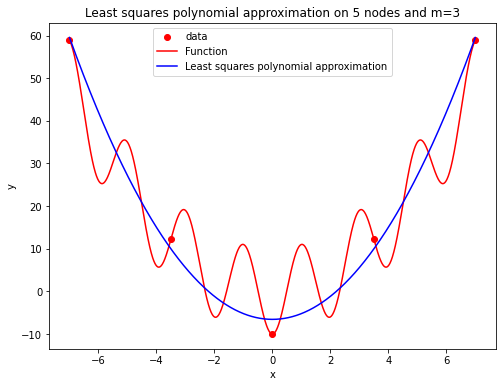

In [9]:
ls_approximation(-7, 7, 5, 3)

n = 12 and m = 5

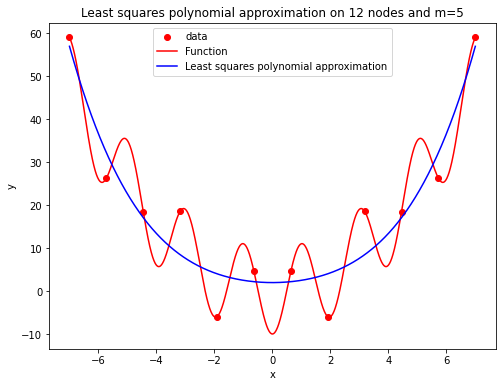

In [10]:
ls_approximation(-7, 7, 12, 5)

n = 15 and m = 6

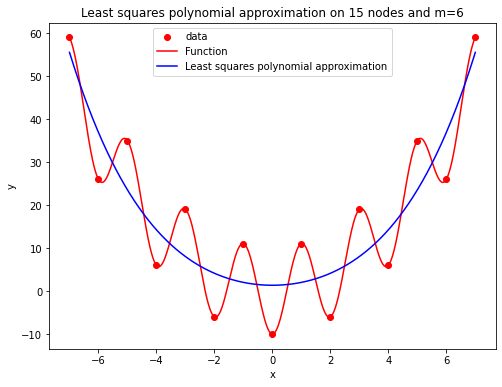

In [11]:
ls_approximation(-7, 7, 15, 6)

n = 15 and m = 12

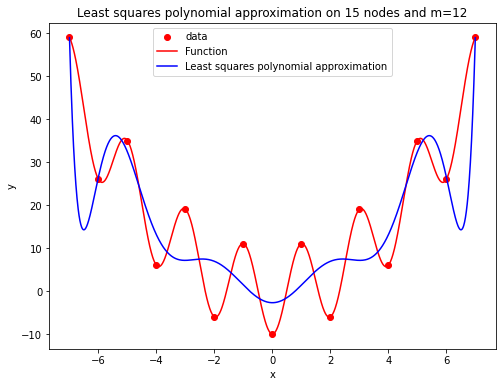

In [12]:
ls_approximation(-7, 7, 15, 12)

n = 25 and m = 10

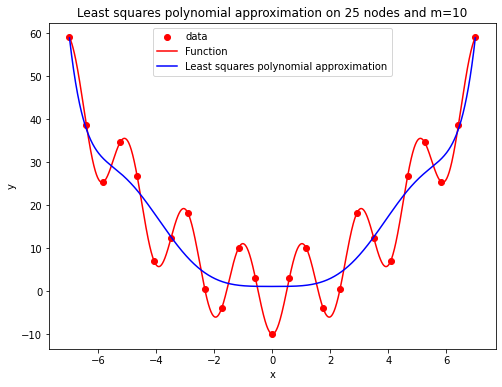

In [13]:
ls_approximation(-7, 7, 25, 10)

n = 25 and m = 15

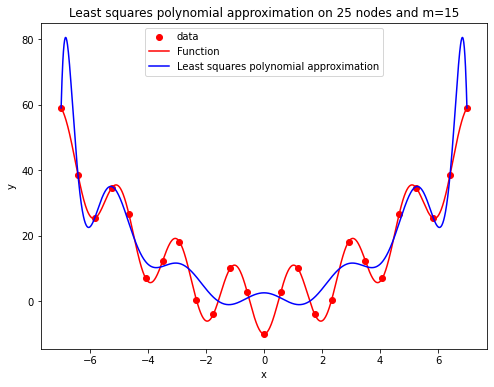

In [14]:
ls_approximation(-7, 7, 25, 15)

n = 40 and m = 3

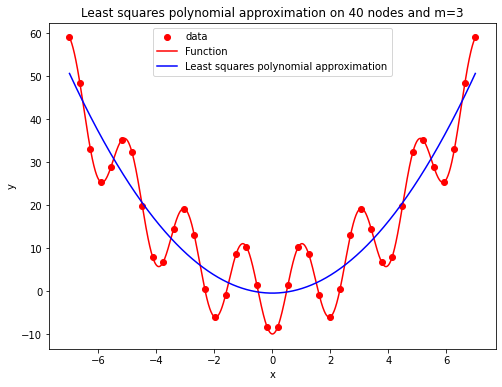

In [15]:
ls_approximation(-7, 7, 40, 3)

n = 45 and m = 25

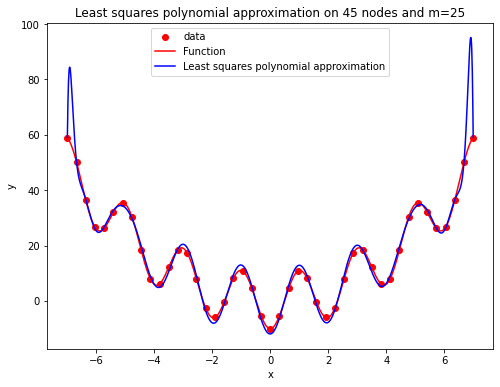

In [16]:
ls_approximation(-7, 7, 45, 25)

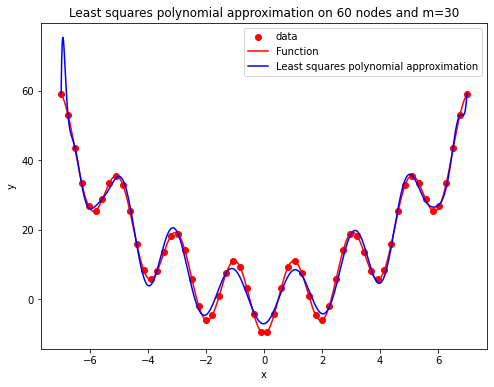

In [17]:
ls_approximation(-7, 7, 60, 30)

## Error for least squares polynomial approximation

In [18]:
def calculate_error(start, stop, m):
    nodes = [4, 5, 7, 10, 15, 20, 30, 50]
    result = [None for _ in range(2 * len(m) * len(nodes))]

    total_X = np.linspace(start, stop, 1000)
    func_val = func(total_X)
    idx = 0

    for n in nodes:
        X = np.linspace(start, stop, n)
        Y = func(X)
        for i in m:
            ls_approximation = least_squares_approximation_func(X, Y, i)
            ls_approximation_result = ls_approximation(total_X)
            result[idx] = max_error(ls_approximation_result, func_val)
            result[idx + 1] = sum_square_error(ls_approximation_result, func_val)
            idx += 2
    df = pd.DataFrame(data={"n": [val for val in nodes for _ in range(len(m))],
                            "m": m * len(nodes),
                            "ls approximation max error": result[::2],
                            "ls approximation sum square error": result[1::2]})
    return df

In [19]:
df = calculate_error(-7, 7, [2, 5, 8, 10, 12, 15])
df

,n,m,ls approximation max error,ls approximation sum square error
0,4,2,39.719750,4.471498e+05
1,4,5,74.296259,1.558274e+06
2,4,8,42.602540,2.439262e+05
3,4,10,32.913118,1.632479e+05
4,4,12,24.697174,1.033603e+05
5,4,15,82.606308,2.021835e+06
6,5,2,36.497528,3.715237e+05
7,5,5,19.908195,1.049595e+05
8,5,8,18.920852,8.817508e+04
9,5,10,19.234876,1.017368e+05


In [20]:
print(df["ls approximation max error"].idxmin())
print(df["ls approximation sum square error"].idxmin())

46
47


Dzięki max error oraz sum square error możemy znaleźć najlepszy wielomian (jego stopień) który aproksymuje naszą funkcję. Rozpatrzyliśmy to dla węzłów: 4, 5, 7, 10, 15, 20, 30, 50 oraz m: 2, 5, 8, 10, 12, 15. W naszym przypadku jest to wielomian z liczbą węzłów równoodległych 50 i stopniem wielomianu 12 dla max error i wielomian z liczbą węzłów równoodległych 50 ze stopniem wielomianu 15 dla sum square error.

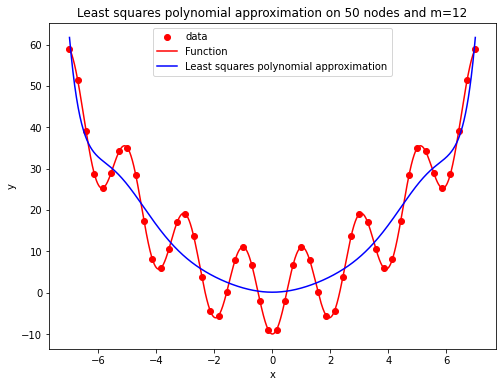

In [21]:
ls_approximation(-7, 7, 50, 12)

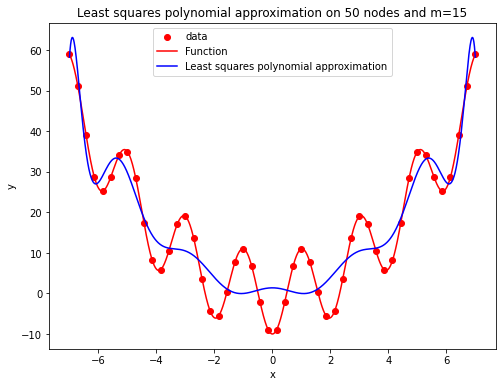

In [22]:
ls_approximation(-7, 7, 50, 15)

## Efekt Rungego

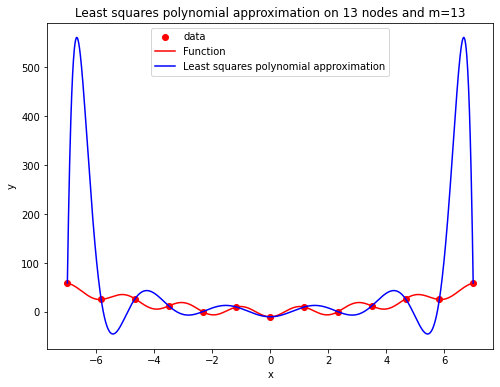

In [23]:
ls_approximation(-7, 7, 13, 13)

Efekt Rungego możemy zaobserwować już dla liczby węzłów równej 13 oraz stopnia wielomianu 13. Możemy to zaobserwować na wykresach oraz na obliczonych błędach. Efekt Rungego nie występuje przy każdym użyciu węzła i liczby m (stopnia wielomianu). Zależy to od dobrania tych dwóch parametrów. Możemy jednak zauważyć, że dla większej liczby węzłów i większego stopnia wielomianu efekt Rungego występuje częsciej niż dla mniejszych wartości tych parametrów.

Przykładu efektu Rungego z innymi parametrami:

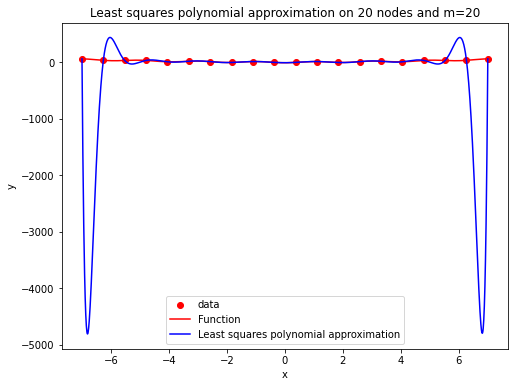

In [24]:
ls_approximation(-7, 7, 20, 20)

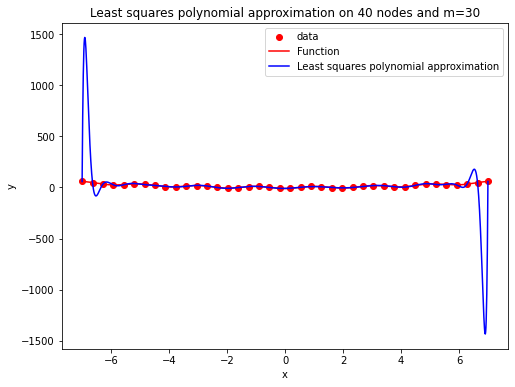

In [25]:
ls_approximation(-7, 7, 40, 30)